Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9277
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1127 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0778 - accuracy: 0.9750
Test accuracy: 0.9750000238418579
1/1 [==============================] - 0s 49ms/step


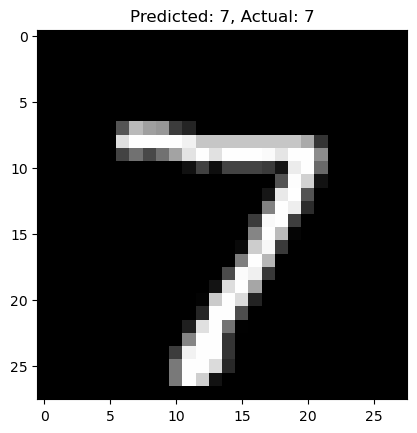

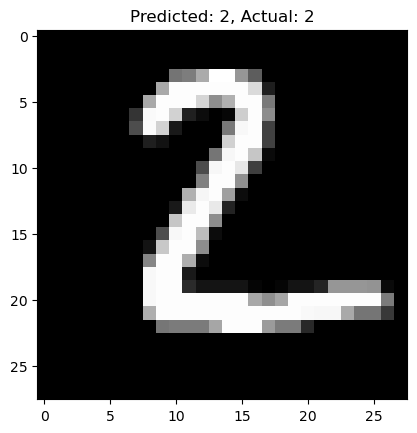

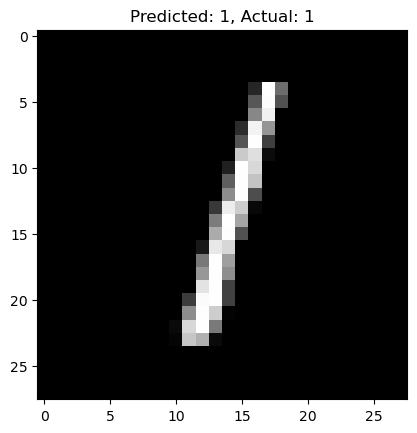

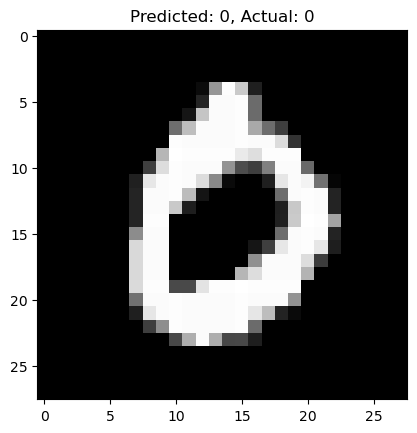

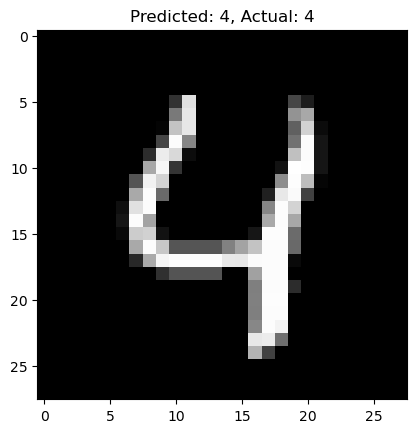

In [35]:
# Import necessary libraries
import os
import struct
from array import array
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define a class for handling the MNIST dataset
class MNIST(object):
    def __init__(self, path='.'):
        # Set the default path for the dataset
        self.path = path

        # Define filenames for test and training datasets
        self.test_img_fname = 't10k-images-idx3-ubyte'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte'

        self.train_img_fname = 'train-images-idx3-ubyte'
        self.train_lbl_fname = 'train-labels-idx1-ubyte'

        # Initialize lists to store images and labels
        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    # Method to load the testing dataset
    def load_testing(self):
        ims, labels = self.load(os.path.join(self.path, self.test_img_fname),
                                os.path.join(self.path, self.test_lbl_fname))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    # Method to load the training dataset
    def load_training(self):
        ims, labels = self.load(os.path.join(self.path, self.train_img_fname),
                                os.path.join(self.path, self.train_lbl_fname))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    # Class method to load image and label data from binary files
    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels

    # Class method to display images in a text format
    @classmethod
    def display(cls, img, width=28, threshold=200):
        render = ''
        for i in range(len(img)):
            if i % width == 0:
                render += '\n'
            if img[i] > threshold:
                render += '@'
            else:
                render += '.'
        return render

# Define the path where the dataset is stored
dataset_path = r'C:\Users\KHALEELBASHA\Desktop\amazon\Handwritten-Digit-Recognition-using-Deep-Learning-main\Handwritten-Digit-Recognition-using-Deep-Learning-main\dataset'

# Create an instance of the MNIST class
mnist = MNIST(dataset_path)

# Load training and testing data
train_images, train_labels = mnist.load_training()
test_images, test_labels = mnist.load_testing()

# Preprocess the data and reshape the images
train_images = np.array(train_images).reshape(-1, 28, 28) / 255.0
test_images = np.array(test_images).reshape(-1, 28, 28) / 255.0

# Convert labels to NumPy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Build a simple neural network model using Keras
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions on a few test images and save them
selected_test_images = test_images[:5]
selected_test_labels = test_labels[:5]

predictions = model.predict(selected_test_images)

# Display the images along with predictions and actual labels, and save them
for i in range(len(selected_test_images)):
    plt.imshow(selected_test_images[i], cmap='gray')  # No need to reshape for display
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {selected_test_labels[i]}')
    plt.savefig(os.path.join(dataset_path, f'output_image_{i}.png'))
    plt.show()
